In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from vlfpy import *
import random
import matplotlib as mpl
mpl.rcParams['mathtext.default'] = 'regular'

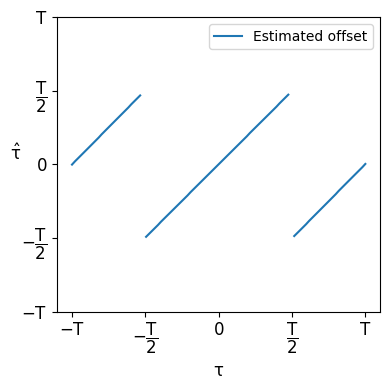

In [175]:
# nice plot

samples = 100
carrier = 20e3
fs = 1e5 #4e6
L0 = 50
T = 1/200
offset = np.linspace(-T,T,samples)
phase_offset = 0
tau_hat = np.zeros(samples)
theta_hat = np.zeros(samples)


s, t, data, phase = generate_msk(L0, 0.5, T, carrier, fs, offset=0, phase_offset=0)

for i in range(samples):

    phase_plot = np.roll(phase, int(fs*offset[i]))
    s = 1/2*np.exp(1j*phase_plot)
    
    _, x, tau_hat[i], theta_hat[i] = phase_and_time_sync(s, int(fs*T), T, fs, L0)
    #theta_hat1[i] = np.copy(theta_hat[i])
    #theta_hat[i] = (theta_hat[i] + 2*np.pi*carrier*tau_hat[i]) % (np.pi) - 0.5*np.pi # low performance
    #theta_hat1[i] = (theta_hat1[i] ) # % (np.pi) -0.5*np.pi # high performance
    

fig, ax = plt.subplots(figsize=(4,4))
tau_hat[tau_hat > 0.5*T-T*0.02] = np.nan
ax.plot(offset, tau_hat, label = 'Estimated offset')
ax.set_xlabel('$\\tau$', fontsize=12)
ax.set_ylabel('$\\hat{\\tau}$', rotation=0, fontsize=12)
ax.legend()

labels = ['$-T$', '$-\dfrac{T}{2}$', '0', '$\dfrac{T}{2}$', '$T$']
ax.set_xticks(np.linspace(-T,T,5))
ax.set_xticklabels(labels,fontsize=12)
ax.set_yticks(np.linspace(-T,T,5))
ax.set_yticklabels(labels, fontsize=12)
plt.tight_layout()

plt.savefig('figures/theory/offset_estimation.pdf')




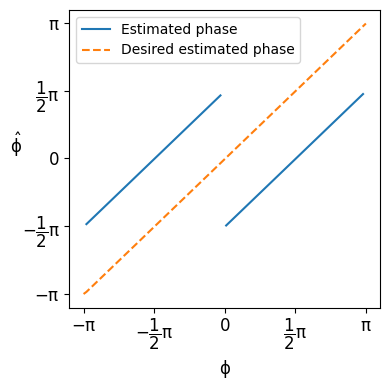

In [185]:
# nice plot

samples = 100
carrier = 20e3
fs = 1e5 #4e6
L0 = 50
T = 1/200
offset = 0
phase_offset = np.linspace(-np.pi,np.pi,samples)
tau_hat = np.zeros(samples)
theta_hat = np.zeros(samples)


s, t, data, phase = generate_msk(L0, 0.5, T, carrier, fs, offset=0.1*T, phase_offset=0)

for i in range(samples):

    #phase_plot = np.roll(phase, int(fs*offset[i]))
    s = 1/2*np.exp(1j*(phase + phase_offset[i]))
    
    _, x, tau_hat[i], theta_hat[i] = phase_and_time_sync(s, int(fs*T), T, fs, L0)
    #theta_hat1[i] = np.copy(theta_hat[i])
    #theta_hat[i] = (theta_hat[i] + 2*np.pi*carrier*tau_hat[i]) % (np.pi) - 0.5*np.pi # low performance
    #theta_hat1[i] = (theta_hat1[i] ) # % (np.pi) -0.5*np.pi # high performance
    
fig, ax = plt.subplots(figsize=(4,4))
theta_plot = np.copy(theta_hat)
theta_plot[theta_plot > np.pi*0.5-0.05] = np.nan
theta_hat[0] = -0.5*np.pi
ax.plot(phase_offset/np.pi, theta_plot/np.pi, label = 'Estimated phase')
ax.plot(phase_offset/np.pi, np.unwrap(theta_hat, period=1*np.pi)/np.pi-0.5, color='C1', label = 'Desired estimated phase', ls='--')
ax.set_xlabel(r'$\phi $', fontsize=12)
ax.set_ylabel(r'$\hat{\phi} $', rotation=0,fontsize=12)
ax.legend()

labels = [r'$-\pi$', r'$-\dfrac{1}{2}\pi$', '0', r'$\dfrac{1}{2}\pi$', r'$\pi$']
ax.set_xticks(np.linspace(-1,1,5))
ax.set_xticklabels(labels,fontsize=12)
ax.set_yticks(np.linspace(-1,1,5))
ax.set_yticklabels(labels,fontsize=12)
plt.tight_layout()

plt.savefig('figures/theory/phase_estimation.pdf')


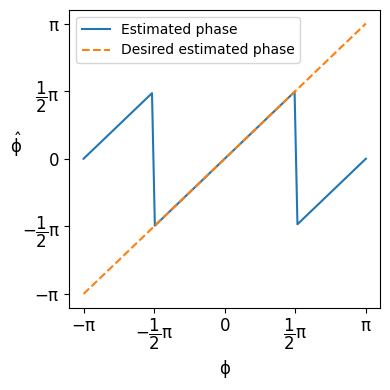

In [187]:
# nice plot

samples = 100
carrier = 20e3
fs = 1e5 #4e6
L0 = 50
T = 1/200
offset = 0
phase_offset = np.linspace(-np.pi,np.pi,samples)
tau_hat = np.zeros(samples)
theta_hat = np.zeros(samples)


s, t, data, phase = generate_msk(L0, 0.5, T, carrier, fs, offset=0.1*T, phase_offset=0)

for i in range(samples):

    #phase_plot = np.roll(phase, int(fs*offset[i]))
    s = 1/2*np.exp(1j*(phase + phase_offset[i]))
    
    _, x, tau_hat[i], theta_hat[i] = phase_and_time_sync(s, int(fs*T), T, fs, L0)
    #theta_hat1[i] = np.copy(theta_hat[i])
    #theta_hat[i] = (theta_hat[i] + 2*np.pi*carrier*tau_hat[i]) % (np.pi) - 0.5*np.pi # low performance
    #theta_hat1[i] = (theta_hat1[i] ) # % (np.pi) -0.5*np.pi # high performance
    
fig, ax = plt.subplots(figsize=(4,4))
theta_plot = np.copy(theta_hat)
#theta_plot[theta_plot > np.pi*0.5-0.05] = np.nan
theta_hat[0] = -0.5*np.pi
ax.plot(phase_offset/np.pi, (theta_plot % np.pi - 0.5*np.pi)/np.pi, label = 'Estimated phase')
ax.plot(phase_offset/np.pi, np.unwrap(theta_hat, period=1*np.pi)/np.pi-0.5, color='C1', label = 'Desired estimated phase', ls = '--')
ax.set_xlabel(r'$\phi $', fontsize=12)
ax.set_ylabel(r'$\hat{\phi} $', rotation=0,fontsize=12)
ax.legend()

labels = [r'$-\pi$', r'$-\dfrac{1}{2}\pi$', '0', r'$\dfrac{1}{2}\pi$', r'$\pi$']
ax.set_xticks(np.linspace(-1,1,5))
ax.set_xticklabels(labels,fontsize=12)
ax.set_yticks(np.linspace(-1,1,5))
ax.set_yticklabels(labels,fontsize=12)
plt.tight_layout()

plt.savefig('figures/theory/phase_estimation_fixed.pdf')

offset 0.002272 tau_hat 0.002305 symbol time 0.005 error 0.0000330224
phase offset 0.0477464829275686 theta_hat 0.4724


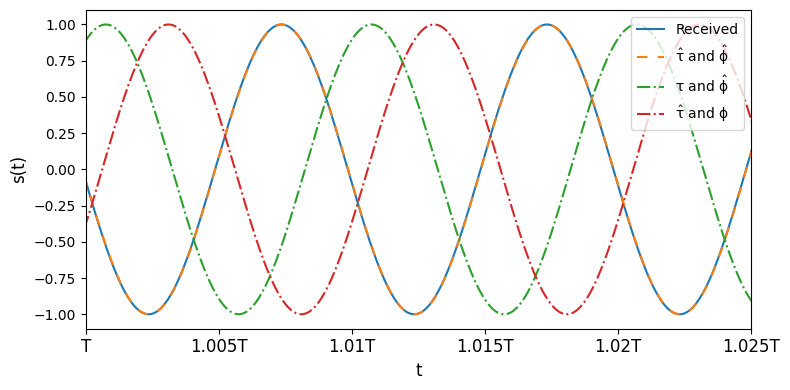

In [63]:
carrier = 20e3
fs = 4e6
L0 = 50
T = 1/200
offset = np.random.uniform(0,T/2)#T/2)
phase_offset = np.random.uniform(-np.pi,np.pi)
phase_offset = 0.15*np.pi
s, t, data, phase = generate_msk(L0, 0.5, T, carrier, fs, offset=offset, phase_offset=phase_offset)
#s += np.random.normal(0, 5, len(s)) 

s = add_zeros(s, 0.0005, 0.0015, fs)

s_down = (s+ np.random.normal(0, 5, len(s)))*np.exp(-1j*2*np.pi*carrier*t)
sos = signal.butter(10, 1/T, 'low', fs=fs, output='sos')
temp = np.append(np.ones(int(fs*T))*np.mean(s_down[0:int(fs*T)]), s_down)
s_down_filt = signal.sosfiltfilt(sos, temp)[int(fs*T):]


_, x, tau_hat, theta_hat = phase_and_time_sync(s_down_filt, int(fs*T), T, fs, L0)

theta_hat = (theta_hat + 2*np.pi*carrier*tau_hat) % (np.pi) - 0.5*np.pi
if tau_hat < 0 :
    theta_hat += 0.5*np.pi  


print('offset', np.round(offset,6), 'tau_hat', np.round(tau_hat,6), 'symbol time', T, 'error' ,f'{np.abs(offset-tau_hat):.10f}')
print('phase offset', np.round(phase_offset/np.pi,4)/np.pi, 'theta_hat',np.round(theta_hat/np.pi,4))

s_est, _, _ = generate_msk_data(data, T, carrier, fs, offset=tau_hat, phase_offset=theta_hat)
s_est_offset, _, phase_est_offset = generate_msk_data(data, T, carrier, fs, offset=offset, phase_offset=theta_hat)
s_est_no_phase, _, phase_est_no_phase = generate_msk_data(data, T, carrier, fs, offset=offset, phase_offset=0)



fig, ax = plt.subplots(figsize=(8,4))
ax.plot(t/T, s, label='Received', color='C0')
ax.plot(t/T, s_est, label='$\hat{\\tau}$ and $\hat{\phi}$ ', ls=(0, (5, 5)), c = 'C1' )
ax.plot(t/T, s_est_offset, label='$\\tau$ and $\hat{\phi}$', ls='-.', c = 'C2')
ax.plot(t/T, s_est_no_phase, label='$\hat{\\tau}$ and $\phi$', ls='-.', c = 'C3')
ax.set_xlim(1, 1.025)
ax.set_xticks(np.linspace(1,1.025,6))
labels = ['T', '1.005T', '1.01T', '1.015T', '1.02T', '1.025T']
ax.set_xticklabels(labels, fontsize=12)
ax.set_xlabel('t', fontsize=12)
ax.set_ylabel('s(t)', fontsize=12)
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig('figures/analysis/sync_example_zeroes.pdf')


In [6]:
# verify timing accuracy 
carriers = np.array([16.40e3, 19.60e3, 20.27e3, 21.75e3, 22.10e3, 23.40e3, 24.00e3, 26.70e3])
baudrate = np.array([200,     200,     200,     200,     100,     200,     200,     100])
T_symbols = 1/baudrate

fs = 4e6
time = 0.5#2
t = np.linspace(0, time, int(fs*time))
avg_error = 0


for j in range(100):

    index = np.random.randint(0, len(carriers))
    
    msk_data = np.zeros_like(t)
    offset = np.zeros(len(carriers))
    for i, (carrier, T) in enumerate(zip(carriers, T_symbols)):    
        offset[i] = random.uniform(0, T_symbols[i]/2)
        phase_offset = random.uniform(-np.pi, np.pi)
        msk_data_single, _, _, _ = generate_msk(int(time/T), 0.5, T, carrier, fs, offset=offset[i], phase_offset=phase_offset, amplitude=1)
        msk_data += msk_data_single

    
    msk_data = msk_data + np.random.normal(0, 5, msk_data_single.shape)
    msk_data =  add_zeros(msk_data, 0.0005, 0.0015, fs)
    # downconvert
    msk_data_down = msk_data * np.exp(-1j*2*np.pi*carriers[index]*t)
 
    # filter
    sos = signal.butter(2,1/T_symbols[index], 'low', output='sos', fs=fs)
    temp = np.append(np.ones(int(fs*T_symbols[index]))*np.mean(msk_data_down[0:int(fs*T_symbols[index])]), msk_data_down)
    msk_data_filtered = signal.sosfiltfilt(sos, temp)[int(fs*T_symbols[index]):]
    # estimate amplitude
    _, _, tau_hat, _  = phase_and_time_sync(msk_data_filtered, int(fs*T_symbols[index]), T_symbols[index], fs, int(time/T_symbols[index]))

    avg_error += np.abs(offset[index] - tau_hat)

print('Average error', avg_error/100)

Average error 6.806211260171711e-05


In [7]:
print(f'{6.806211260171711e-05:.10f}')

0.0000680621


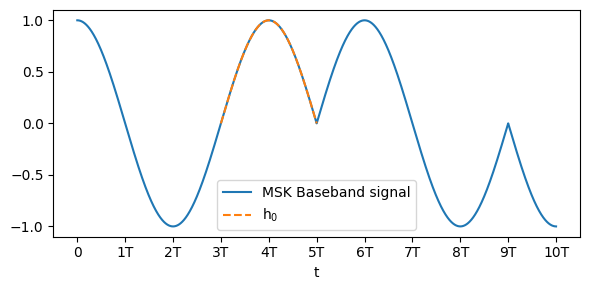

In [112]:
L0 = 10
offset = 0#0.1*T
phase_offset =0 # 0.3*np.pi


s, t, data, phase = generate_msk(L0, 0.5, T, carrier, fs, offset=offset, phase_offset=phase_offset)
s = np.exp(1j*phase)

_, _, tau_hat, theta_hat = phase_and_time_sync(s, int(fs*T), T, fs, L0)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(t/T,np.real(s), label='MSK Baseband signal')   


q = np.linspace(0, 0.5, int(fs*T), endpoint=False)
q = np.concatenate((q, np.array([0.5]), np.flip(q)))
h0 = np.sin(np.pi*q)
ax.plot(t[int(len(h0)*1.5):int(2.5*len(h0))]/T,h0, linestyle='--', label = '$h_0$')
ax.legend()
ax.set_xlabel('t')
x_ticks = [0 , '1T', '2T', '3T', '4T', '5T', '6T', '7T', '8T', '9T', '10T']
ax.set_xticks(np.linspace(0, 10, 11))
ax.set_xticklabels(x_ticks)

plt.tight_layout()
plt.savefig('figures/theory/filter_correlation.pdf')

In [53]:
def saw(x,T):
    # x : input signal
    # T : upper and lower limits of the function

    return ((x+T/2) % (2*T/2))- T/2

#def saw(x,T):
#    return (x % T) - T/2

    

def phase_and_time_sync(r,N,T,fs,L0):
    # r : baseband input signal
    # T : symbol period
    # fs : sampling frequency
    # N : number of samples per symbol
    # L0 : number of symbols
    
    
    q = np.linspace(0, 0.5, int(fs*T), endpoint=False)
    q = np.concatenate((q, np.array([0.5]), np.flip(q)))
    h0 = np.sin(np.pi*q)

    x = signal.convolve(r, h0,'valid')**2 # atomatically chooses the fastest method, signal for speed

    lambda_2 = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(0,L0-2):
            #lambda_2[k] += (-1)**n*x[int(T*fs*n+T*fs*k//N)]
            lambda_2[k] += (-1)**n*x[int(N*n+k)]
            
    lambda_2 = lambda_2/L0
    
    #plt.plot(h0)
    #plt.plot(r)
    #plt.plot(x.real/np.max(np.abs(x)))
    
    k = np.arange(N)
    #tau_hat = np.sum((np.abs(lambda_2[k]**2)*np.exp(-1j*2*np.pi*k/N)))
    tau_hat = np.sum((np.abs(lambda_2[k])**2*np.exp(-1j*2*np.pi*k/N)))
    tau_hat = -T/(2*np.pi)*np.angle(tau_hat)

    
    

    #k_hat = np.argmin(np.abs(saw(tau_hat - 2*np.pi*22.35e3*offset-k*T/N,T)))
    #k_hat = np.argmin(np.abs(saw(tau_hat -k*T/N,T)))
    #print(tau_hat)
    #print(2*np.pi*22.35e3*offset)
    
    #theta_hat = 0.5*np.angle(lambda_2[k_hat])
    
    #print((lambda_2[2*int(tau_hat*fs)]).real, (lambda_2[2*int(tau_hat*fs)]).imag,(0.5*(np.angle(lambda_2[2*int(tau_hat*fs)]))-np.pi/2)/np.pi)
    #theta_hat = 0.5*np.angle(lambda_2[int(tau_hat*fs)])
    #plt.plot((lambda_2.real))
    #plt.plot((lambda_2.imag))
    #plt.plot(np.angle(lambda_2))
    #print(int(tau_hat*fs))
    theta_hat = 0.5*(np.angle(lambda_2[int(tau_hat*fs)]))# - np.pi/2
    #if (lambda_2[2*int(tau_hat*fs)]).imag < 0:
    #    print('negative')
    #    theta_hat -= np.pi
    #if np.mean(np.angle(x)) < 0:
    #    print('negative')
    
    #print(k_hat, int(tau_hat*fs), int(tau_hat*fs+2*np.pi*22.35e3*offset*fs))
    #print(int(tau_hat*fs))
    #plt.plot((lambda_2))

    

    return r, x, tau_hat, theta_hat



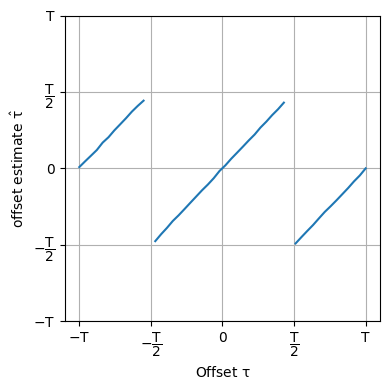

In [46]:
# simulate offset
samples = 50
L0 = 50
T = 1/200
offset = np.linspace(-T,T,samples)
tau_hat = np.zeros(samples)
carrier = 22.35e3
fs = 4e6
sos = signal.butter(2,1/T, 'low', output='sos',fs=fs)

for i in range(samples):
    s, t, data, phase = generate_msk(L0, 0.5, T, carrier, fs, offset=offset[i], phase_offset=0)
    s_down = s*np.exp(-1j*2*np.pi*carrier*t)
    temp = np.append(np.ones(int(fs*T))*np.mean(s_down[0:int(fs*T)]), s_down)
    s_down_filt = signal.sosfiltfilt(sos, temp)[int(fs*T):]
    _, _, tau_hat[i], _ = phase_and_time_sync(s_down_filt, int(fs*T), T, fs, L0)


fig, ax = plt.subplots(figsize=(4,4))
tau_hat[tau_hat > 0.5*T-T*0.05] = np.nan
ax.plot(offset,tau_hat)
ax.grid()
labels = ['$-T$', '$-\dfrac{T}{2}$', '0', '$\dfrac{T}{2}$', '$T$']
ax.set_xticks(np.linspace(-T,T,5))
ax.set_xticklabels(labels)
ax.set_yticks(np.linspace(-T,T,5))
ax.set_yticklabels(labels)
ax.set_xlabel('Offset $\\tau$')
ax.set_ylabel('offset estimate $\hat{\\tau}$')
plt.tight_layout()
plt.savefig('figures/analysis/offset_estimation.pdf')
    

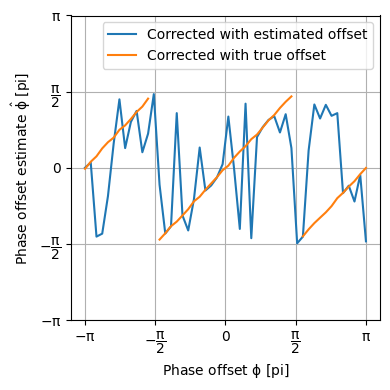

In [10]:
# simulate phase offset
samples = 50
L0 = 50
phase_offset = np.linspace(-np.pi,np.pi,samples)
theta_hat = np.zeros(samples)
theta_hat1 = np.zeros(samples)
tau_hat = np.zeros(samples)
error = np.zeros(samples)
T=1/200
carrier = 18.7e3 
fs = 4e6
offset = T*0.1
sos = signal.butter(2,1/T, 'low', output='sos',fs=fs)
for i in range(samples):
    s, t, data, phase = generate_msk(L0, 0.5, T, carrier, fs, offset=offset, phase_offset=phase_offset[i])
    s_down = s*np.exp(-1j*2*np.pi*carrier*t)
    temp = np.append(np.ones(int(fs*T))*np.mean(s_down[0:int(fs*T)]), s_down)
    s_down_filt = signal.sosfiltfilt(sos, temp)[int(fs*T):]
    
    _, _, tau_hat[i], theta_hat[i] = phase_and_time_sync(s_down_filt, int(fs*T), T, fs, L0)
    theta_hat1[i] = np.copy(theta_hat[i])
    theta_hat1[i] = (theta_hat1[i] + 2*np.pi*carrier*offset)  % (np.pi) -0.5*np.pi # high performance
    theta_hat[i] = (theta_hat[i] + 2*np.pi*carrier*tau_hat[i]) % (np.pi) - 0.5*np.pi # low performance
    if tau_hat[i] < 0:
        theta_hat[i] += 0.5*np.pi
    if offset < 0:
        theta_hat1[i] += 0.5*np.pi


theta_hat1[theta_hat1 > np.pi*0.5-0.05] = np.nan
theta_hat1[theta_hat1 < -np.pi*0.5+0.05] = np.nan

#theta_hat[theta_hat > np.pi*0.5-0.05] = np.nan
#theta_hat[theta_hat < -np.pi*0.5+0.05] = np.nan

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(phase_offset/np.pi,theta_hat/np.pi, label = 'Corrected with estimated offset')
ax.plot(phase_offset/np.pi,theta_hat1/np.pi, label = 'Corrected with true offset')
ax.grid()
ax.set_xlabel('Phase offset $\phi$ [pi]')
ax.set_ylabel('Phase offset estimate $\hat{\phi}$ [pi]')
ax.set_xticks(np.linspace(-1,1,5))
ax.set_yticks(np.linspace(-1,1,5))
labels = ['$-\pi$', '$-\dfrac{\pi}{2}$', '0', '$\dfrac{\pi}{2}$', '$\pi$']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.legend()
plt.tight_layout()

plt.savefig('figures/analysis/phase_estimation.pdf')
